# Restaurant Geographical Analysis
Get a sense of where restaurants are located geographically. Use clustering to add geography label to Restaurant IDs

# Business Questions
* How is it determined which restaurant serves which outpost?

# Challenges and potential solutions
* How to determine whether to open a new restaurant or outpost?
    * Determine which value statement is over capacity in the area? In other words which demand goes unfulfilled day to day
* Where should a new restaurant or outpost be opened?
    * Create 2D surface of factors, for example proximity to other restaurants, population density, market demographics in region distance from suppliers, supplier capacity, istance from suppliers, supplier capacity. Then optimize over that space to pick minimum or maximum value. This method could be validated by removing current resaurant and seeing if model picks similar location. Not a perfect validation technique but easy to run
    * A causal model could be made of current restaurants to make a binary prediction on success/failure, or a continous target such as revenue
    * Given candidate locations Markov Decision Processes seem to be sucessful in determin

In [1]:
import sweetgreen as sg
import pandas as pd
import json
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [2]:
restaurants = sg.utils.read_json("../data/cleaned/flattened_restaurants.json")
restaurants_df = pd.DataFrame(restaurants)
restaurants_df.iloc[0]

Fri_end                                                                     22:00
Fri_start                                                                   10:30
Mon_end                                                                     22:00
Mon_start                                                                   10:30
Sat_end                                                                     22:00
Sat_start                                                                   10:30
Sun_end                                                                     22:00
Sun_start                                                                   10:30
Thu_end                                                                     22:00
Thu_start                                                                   10:30
Tue_end                                                                     22:00
Tue_start                                                                   10:30
Wed_end         

In [3]:
restaurants_sub_df = restaurants_df[["latitude", "longitude", "restaurant_slug", "hidden", "is_outpost"]]

In [4]:

def plot_map(extent=None, roads=False):
    fig = plt.figure(figsize=(14,14))
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.outline_patch.set_visible(False)

    if extent is None:
        extent = [-125, -66.5, 20, 50]
        
    ax.set_extent(extent, ccrs.Geodetic())
    
    facecolor = "#ebe9e7"
    # Plot States
    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
    
    for state in shpreader.Reader(states_shp).geometries():
        ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor='black')

    if roads is True:
        # Plot Roads
        roads = shpreader.Reader("../data/shapefile/tl_2018_us_primaryroads.dbf")

        for road in roads.geometries():
            ax.add_geometries([road], ccrs.PlateCarree(),
                             facecolor="None",  edgecolor='black', alpha=1, linewidth=5)

    return ax

## Plot Sweetgreen Locations across United States

Text(0.5, 1.0, 'Sweetgreen Locations across United States')

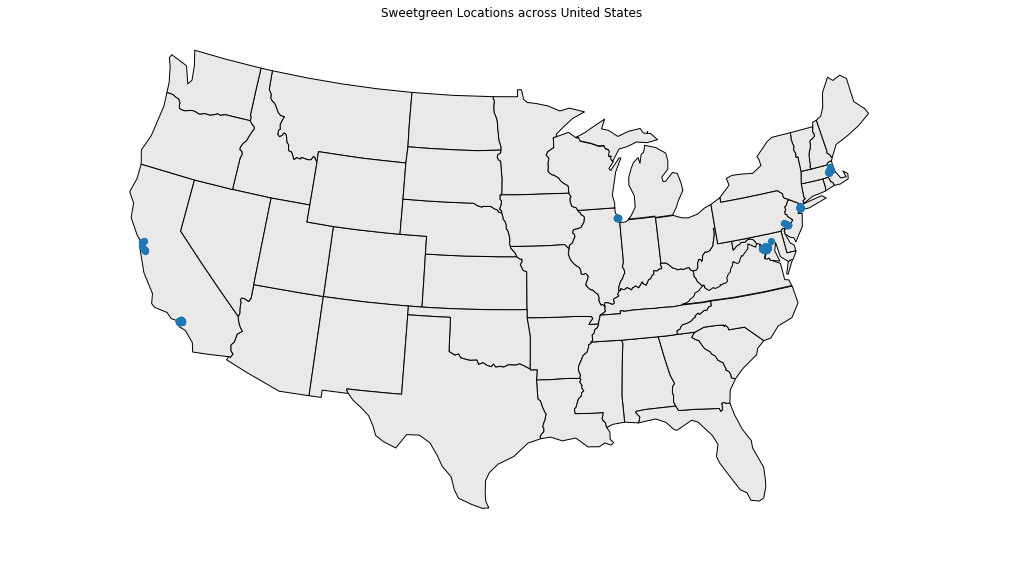

In [5]:
ax = plot_map()

# Longitude, Latitude
ax.scatter(restaurants_df["longitude"].values,
           restaurants_df["latitude"].values,
           transform=ccrs.Geodetic(), s= 40, zorder=10)
ax.set_title("Sweetgreen Locations across United States")

## Plot Los Angeles Public and Hidden Locations

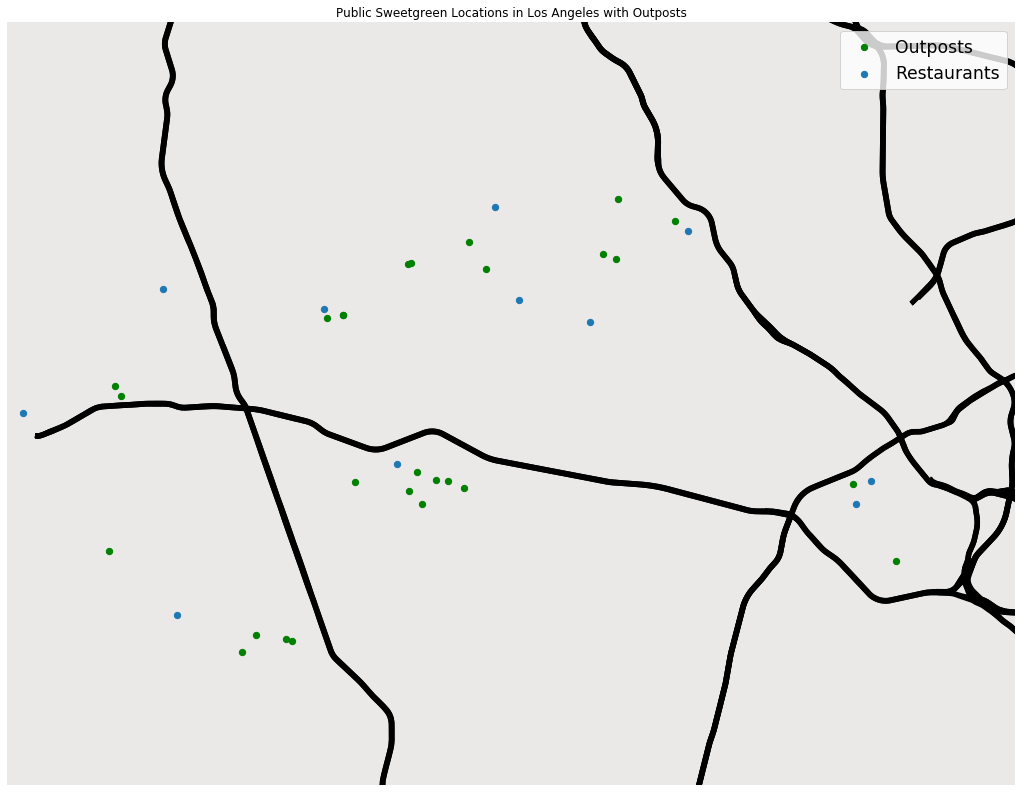

In [12]:
los_angeles_extent = [-118.489162, -118.230487, 34.115037, 33.980718]
ax = plot_map(extent=los_angeles_extent, roads=True)
ax.set_title("Public Sweetgreen Locations in Los Angeles with Outposts")

outpost_mask = restaurants_df["is_outpost"]
hidden_mask = restaurants_df["hidden"]

# Plot Outposts
outposts = ax.scatter(restaurants_df.loc[outpost_mask & ~hidden_mask, "longitude"].values,
           restaurants_df.loc[outpost_mask & ~hidden_mask,"latitude"].values,
           transform=ccrs.Geodetic(), s= 40, zorder=10, c="green", label="Outposts")

# Plot Restaurants
restaurants = ax.scatter(restaurants_df.loc[~outpost_mask & ~hidden_mask, "longitude"].values,
           restaurants_df.loc[~outpost_mask & ~hidden_mask,"latitude"].values,
           transform=ccrs.Geodetic(), s= 40, zorder=10,  label='Restaurants')

plt.legend((outposts, restaurants),
           ('Outposts', 'Restaurants'),
           scatterpoints=1,
           loc='upper right',
          fontsize="xx-large")

,name,address,restaurant_slug
105,West Adams Delivery Kitchen,1842 W Washington Blvd,west-adams-delivery-kitchen
110,Headspace-Old,11677 San Vicente Blvd,headspace-old
145,Montana Ave,1517 Montana Ave,montana-ave
188,Demo Five,4718 Admiralty Way,demo-five
201,ZipRecruiter,604 Arizona Ave,ziprecruiter


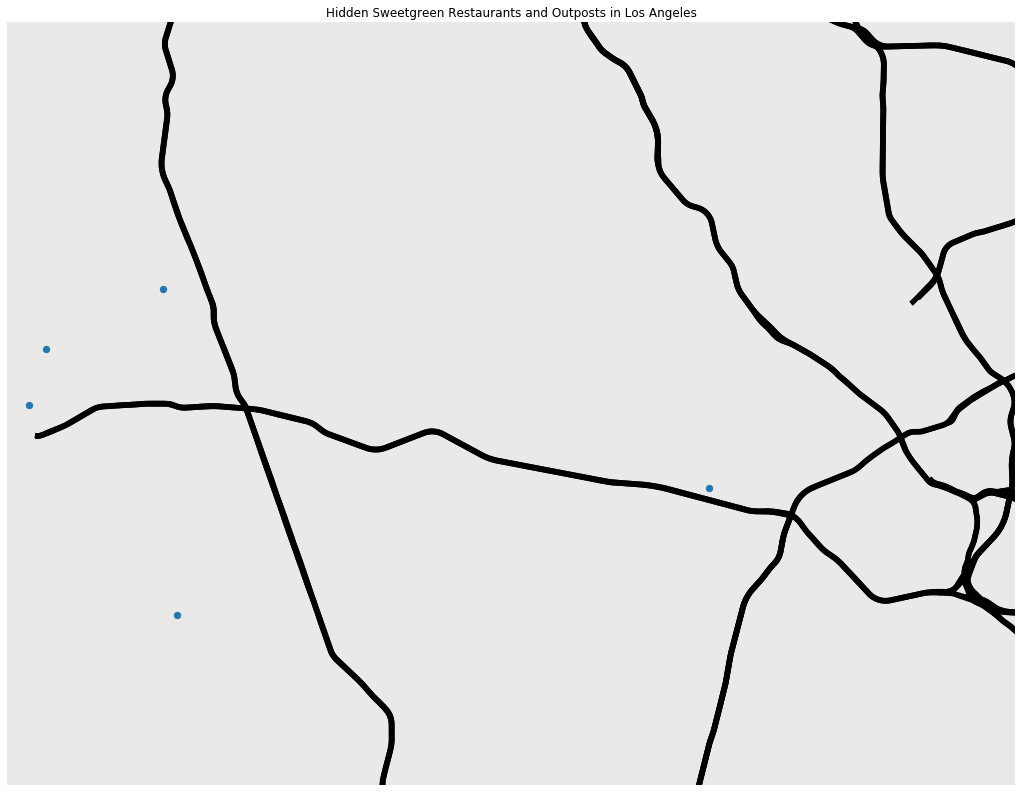

In [7]:
ax = plot_map(extent=los_angeles_extent, roads=True)
ax.set_title("Hidden Sweetgreen Restaurants and Outposts in Los Angeles")

# Plot Outposts
ax.scatter(restaurants_df.loc[outpost_mask & hidden_mask, "longitude"].values,
           restaurants_df.loc[outpost_mask & hidden_mask,"latitude"].values,
           transform=ccrs.Geodetic(), s= 40, zorder=10, c="green")

# Plot Restaurants
ax.scatter(restaurants_df.loc[~outpost_mask & hidden_mask, "longitude"].values,
           restaurants_df.loc[~outpost_mask & hidden_mask,"latitude"].values,
           transform=ccrs.Geodetic(), s= 40, zorder=10)

restaurants_df.loc[hidden_mask & (restaurants_df["state"]=="CA"), ["name", "address", "restaurant_slug"]]